# Декораторы. Классовые и статические методы


## Декораторы
**Декораторы** — это способ изменить поведение функции, не изменяя её код. Декоратор принимает функцию, добавляет к ней новую логику и возвращает изменённую версию.   

В Python функции являются объектами, поэтому их можно передавать и возвращать из других функций. Декораторы используют это свойство.  

### Как работает декоратор?  
1. Создаётся функция-декоратор, принимающая другую функцию.
2. Внутри декоратора объявляется вложенная функция, которая выполняет дополнительный код перед и/или после вызова исходной функции.
3. Декоратор возвращает эту вложенную функцию.


In [ ]:
def simple_decorator(func):    # Функция-декоратор, принимает другую функцию
    def wrapper():  # Вложенная функция-обертка, добавляющая дополнительное поведение
        print("Перед вызовом функции")
        func()  # Вызываем переданную функцию
        print("После вызова функции")
    return wrapper  # Возвращаем изменённую функцию

def say_hello():
    print("Привет!")

decorated = simple_decorator(say_hello)  # Вызываем декоратор, теперь decorated = wrapper
print(decorated)
decorated()  # Теперь вызов say_hello() происходит через wrapper


После применения декоратора результат (wrapper) можно сохранить в переменной с тем же именем, что и декорируемая функция.
Тогда вместо вызова оригинальной функции будет вызываться функция wrapper, добавляющая дополнительный функционал.


In [ ]:
def simple_decorator(func):    # Функция-декоратор, принимает другую функцию
    def wrapper():  # Вложенная функция-обертка, добавляющая дополнительное поведение
        print("Перед вызовом функции")
        func()  # Вызываем переданную функцию
        print("После вызова функции")
    return wrapper  # Возвращаем изменённую функцию

def say_hello():
    print("Привет!")

say_hello = simple_decorator(say_hello)  # Вызываем декоратор, теперь decorated = wrapper
print(say_hello)
say_hello()  # Теперь вызов say_hello() происходит через wrapper


## Синтаксис @decorator
Вместо явного вызова `decorated = simple_decorator(say_hello)` можно использовать @ с именем декоратора перед определением функции: 


In [ ]:
def simple_decorator(func):    # Функция-декоратор, принимает другую функцию
    def wrapper():  # Вложенная функция, добавляющая дополнительное поведение
        print("Перед вызовом функции")
        func()  # Вызываем переданную функцию
        print("После вызова функции")
    return wrapper  # Возвращаем изменённую функцию

@simple_decorator  # Эквивалентно say_hello = simple_decorator(say_hello)
def say_hello():
    print("Привет!")

say_hello()


##### Пример использования декоратора
Декораторы полезны, когда нужно добавлять дополнительное поведение к функциям. Один из распространённых примеров — декоратор для измерения времени выполнения. 


In [ ]:
import time

def timing_decorator(func):
    def wrapper():
        start_time = time.time()  # Засекаем время перед выполнением функции
        func()  # Вызываем декорируемую функцию
        end_time = time.time()  # Засекаем время после выполнения
        print(f"Функция {func.__name__} выполнялась {end_time - start_time:.5f} секунд")
    return wrapper

@timing_decorator  # Применение декоратора
def slow_function():
    time.sleep(2)  # Имитация долгой операции
    print("Функция выполнена")

slow_function()


### Где применяются декораторы
Основные области применения декораторов:
1. **Логирование вызовов функций**

* Запись информации о вызове функции, её аргументах и результатах.
* Используется в отладке и мониторинге работы программы.
 
2. **Измерение времени выполнения**
* Декоратор может засекать время работы функции и выводить его.**  
* Полезно при оптимизации кода.
  
3. **Ограничение частоты вызовов (Throttling)**  
* Контроль количества вызовов функции в единицу времени.  
* Применяется, например, в защите от спама или сетевых запросах.
   
4. **Проверка и валидация входных данных**  
* Декораторы могут проверять, корректны ли переданные аргументы.  
* Полезно в API, валидации форм и обработке ошибок.
 
5. **Автоматическое повторение выполнения (Retry)**  
* Если функция неудачно выполняется (например, сбой сети), можно автоматически повторять попытки.  
* Используется в сетевых запросах и файловых операциях.
  
6. **Ограничение доступа**  
* Декораторы могут проверять, имеет ли пользователь нужные права для вызова функции.  
* Применяется в системах аутентификации и авторизации.
   
7. **Кеширование результатов**  
* Декораторы позволяют сохранять результат функции и не пересчитывать его при повторных вызовах.  
* Полезно в сложных вычислениях и оптимизации запросов к базе данных.
  
8. **Автоматическое изменение данных**  
* Можно автоматически приводить результаты функции к нужному формату, например, делать текст заглавными буквами или добавлять символы.**  
* Используется в обработке текста, форматировании вывода.  


## Поля класса
Вернемся к ООП. До этого мы работали с полями объектов — данными, которые принадлежат каждому конкретному экземпляру.
Но в Python можно также создавать поля класса.  
**Поле класса** (атрибут класса) — это переменная, которая принадлежит самому классу, а не отдельному объекту.  
Все экземпляры класса могут получить к ней доступ, и при этом значение хранится в одном месте — внутри класса.  

**Синтаксис:**   
```
class ClassName:
    class_attribute = value  # поле класса
```
* class_attribute — поле класса, общее для всех объектов
* value — значение этого поля


In [ ]:
class Book:
    library_name = "Central Library"  # поле класса

    def __init__(self, title, author):
        self.title = title    # поле объекта
        self.author = author  # поле объекта


##### Когда использовать:
* Для хранения настроек, категорий, счётчиков, общих значений
* Когда значение одинаково для всех объектов


### Доступ к полям
Поля класса можно читать и изменять как внутри класса, так и снаружи — через класс или объект.
Но при этом поведение может отличаться — особенно при изменении значений.   

**1. Чтение поля класса**  
Поле класса можно прочитать как:
* напрямую через класс: ClassName.attribute
* через объект: object_name.attribute
* внутри методов класса — через self.attribute или ClassName.attribute


In [ ]:
class Book:
    library_name = "Central Library"  # поле класса

    def __init__(self, title, author):
        self.title = title
        self.author = author

    def show_library(self):
        print(self.library_name)  # доступ через self
        print(Book.library_name)  # доступ через имя класса

print(Book.library_name)  # доступ через класс
book = Book("1984", "George Orwell")
print(book.library_name)  # доступ через объект
book.show_library()       # доступ изнутри


**2. Изменение значения через класс**  
Если нужно изменить значение для всех объектов, это делается через класс.


In [ ]:
class Book:
    library_name = "Central Library"  # поле класса

    def __init__(self, title, author):
        self.title = title
        self.author = author

book = Book("1984", "George Orwell")
book2 = Book("Brave New World", "Aldous Huxley")
Book.library_name = "City Library"
print(Book.library_name)
print(book.library_name)      # у объекта тоже изменилось
print(book2.library_name)     # у объекта тоже изменилось


**3. Создание поля через объект**  
Если попытаться изменить значение поля через объект, на самом деле будет создано новое поле в конкретном объекте, не затронув поле класса.


In [ ]:
class Book:
    library_name = "Central Library"  # поле класса

    def __init__(self, title, author):
        self.title = title
        self.author = author

book = Book("1984", "George Orwell")
book2 = Book("Brave New World", "Aldous Huxley")

book.library_name = "Private Shelf"  # создаёт новое поле в book
print(book.library_name)  # Private Shelf — новое значение в объекте
print(Book.library_name)  # поле класса не изменилось



### Классовые методы
**Классовый метод** — это метод, который работает не с конкретным объектом, а с самим классом.
Он получает доступ не к self, а к cls — ссылке на класс, из которого был вызван.
Чтобы объявить такой метод, используется декоратор @classmethod. Этот декоратор превращает первый аргумент метода в ссылку на класс, а не на объект. Это позволяет методу работать с классом, а не конкретным объектом.
#### Зачем нужны классовые методы?
* Чтобы работать с полями класса (например, счётчиками или общими настройками)
* Чтобы добавлять поведение, относящееся к самому классу, а не к отдельному экземпляру  
**Синтаксис:**
``` 
class ClassName:
    @classmethod
    def method_name(cls, ...):
        ...
```
* @classmethod — декоратор, помечающий метод как классовый
* cls — ссылка на сам класс (аналог self, но для класса)


##### Пример: счётчик созданных объектов 

In [ ]:

class Book:
    total_books = 0  # поле класса

    def __init__(self, title, author):
        self.title = title
        self.author = author
        Book.total_books += 1

    @classmethod
    def show_total(cls):
        print(f"Total books: {cls.total_books}")
        # print(cls.title)  # Нельзя обратиться к полю объекта

Book.show_total()     # Вызов через класс
book1 = Book("1984", "George Orwell")
book2 = Book("Brave New World", "Aldous Huxley")

Book.show_total()     # Вызов через класс
book1.show_total()    # Вызов через объект


##### Пример: поведение, связанное с классом
Классовые методы также полезны, когда нужно выполнить действие, относящееся ко всему классу,например, вывести настройки по умолчанию или сбросить глобальные параметры. 


In [ ]:
class Book:
    default_format = "PDF"
    default_language = "en"

    @classmethod
    def show_defaults(cls):
       print(f"Format: {cls.default_format}, Language: {cls.default_language}")

    @classmethod
    def reset_defaults(cls):
        cls.default_format = "PDF"
        cls.default_language = "en"

Book.default_format = "EPUB"  # Изменение формата
Book.show_defaults()          # Просмотр текущих настроек
Book.reset_defaults()         # Сброс до базовых настроек
Book.show_defaults()          # Просмотр текущих настроек


### Статические методы
Статический метод — это метод, который не зависит ни от объекта, ни от самого класса. Он работает как обычная функция, но помещён внутрь класса для логической связанности с ним.    
Чтобы объявить такой метод, используется декоратор @staticmethod.   
#### Когда использовать статические методы?  
Когда функция логически относится к классу, но не использует ни self, ни cls
Чтобы сгруппировать связанную логику внутри класса, а не выносить её в отдельные функции вне класса

**Синтаксис:**   
```
class ClassName:
    @staticmethod
    def method_name(...):
        ...
```
* `@staticmethod` — декоратор, превращающий метод в статический  
* Такой метод не получает ни self, ни cls


In [ ]:
#Пример: вспомогательная функция внутри класса 
class Book:
    def __init__(self, title):
        self.title = title

    @staticmethod
    def is_title_valid(title):
        return isinstance(title, str) and len(title) > 0

print(Book.is_title_valid("1984"))       # True
print(Book.is_title_valid(""))           # False
print(Book.is_title_valid(123))          # False


* Такой метод можно вызывать и через класс (Book.is_title_valid()), и через объект — результат будет одинаков.

In [ ]:
#Пример: логически связанные, но независимые операции 
class MathHelper:
    @staticmethod
    def square(x):
        return x * x

    @staticmethod
    def cube(x):
        return x * x * x

print(MathHelper.square(5))
print(MathHelper.cube(3))


#### Сравнение типов методов

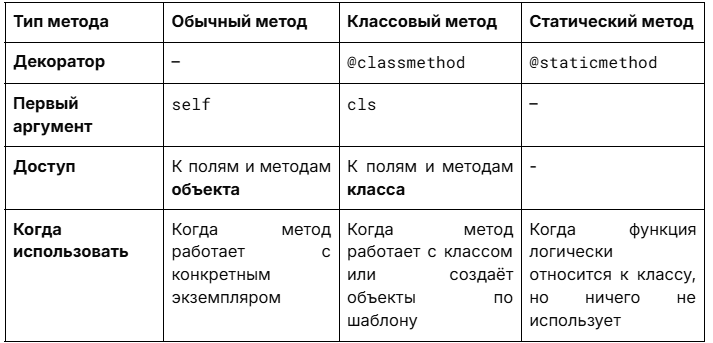

# Практические задания
1. **Расстояние между городами**  
Создайте класс City, представляющий город с координатами.  
У каждого города есть поля name, latitude, longitude.  
Добавьте строковое представление объекта.  
Добавьте метод distance(city1, city2), который возвращает кортеж (latitude, longitude) между двумя городами.  
Проверьте расстояние между двумя городами.

**Пример вывода** 
City: Berlin (52.52, 13.4)  
City: Paris (48.85, 2.35)  
Distance: 14.72


In [ ]:
class City:
    def __init__(self, name, latitude, longitude):
        self.name = name
        self.latitude = latitude
        self.longitude = longitude

    def __str__(self):
        return f"City: {self.name} ({self.latitude}, {self.longitude})"

    @staticmethod
    def distance(city1, city2):
        lat_diff = round(city1.latitude - city2.latitude, 2)
        lon_diff = round(city1.longitude - city2.longitude, 2)
        return lat_diff, lon_diff

berlin = City("Berlin", 52.52, 13.40)
paris = City("Paris", 48.85, 2.35)

print(berlin)
print(paris)
print("Distance:", City.distance(berlin, paris))
